<a href="https://colab.research.google.com/github/SrNach/ADA-Informes/blob/main/Informe_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Informe Semana 9**
Algoritmo: Problema de la mochila  
Autor: Ignacio Silva

In [5]:
# Librerias a Utilizar
from termcolor import colored
import random as rd
import matplotlib.pyplot as plt

#Descripción del Problema

**Problema: Problema de la mochila (KnapSack)**  

**Entrada:** Dos arreglos de largo $n$, representando $n$ elementos donde en cada lista se guardan el peso y el valor respectivo de cada elemento. Además se entrega el peso máximo que podemos guardar en nuestra mochila imaginaria.  

**Salida:** Retorna el valor máximo que podemos almacenar en la mochila, la combinación de elementos debe pesar menos o lo mismo que el peso que nos entregan.

![image.png](https://miro.medium.com/max/1400/1*3bZOzhhzAtmcYYc427m5Aw.png)

Imaginemos que somos un ladrón, y queremos robar un hogar donde se encuentran 5 elementos con los pesos y valores que se observan el la imagen anterior.

Debemos tomar una decisión y robar los objetos que más valor tengan, pero tenemos una limitación, y es que contamos con solo una mochila con peso máximo de 15kg, es por eso que debemos encontrar la combinación de objetos que nos entreguen el mayor valor posible sin pasarse de la capacidad de la mochila.

Para este ejemplo, la mejor configuración para hacer el robo más óptimo es este:

- 1kg → $2   

- 1kg → $1  

- 2kg → $2  

- 4kg → $10

Dándonos un valor total de $15, con peso 15kg.

#Descripción del Algoritmo

Veremos dos formas de implementar el algoritmo para resolver el problema de la mochila. Estudiaremos como se resuelve KnapSack con programación dinámica e implementándolo como un algoritmo voraz. Cabe resaltar que estudiaremos el algoritmo 0-1 KnapSack, esto quiere decir que los objetos que usaremos durante los procesos no serán divisibles.

###**Programación Dinámica (Bottom-Up)**

Como bien sabemos, la programación dinámica con la variente Bottom-Up lo que hace es calcular desde el caso base ($0$) hasta el caso que estamos buscando, utilizando resultados calculados y guardados anteriormente. Debemos utilizar memoria adicional para esto, se utiliza una matriz de $(n+1) \cdot (W+1)$, siendo $n$ la cantidad de objetos, y $W$ la capacidad máxima de la mochila.  

Una variable $i$ se moverá de $0$ hasta $n+1$ para llegar al resultado que queremos desde el caso base. Para cada $i$, existe $j$ que corresponde a los pesos, es decir, desde el peso $0$ hasta el peso $W$.  
Al recorrer los pesos posibles para cada situación, se pueden presentar los siguientes casos:
1. **$i==0$ o $j==0$:** Espacio de matriz inutilizada, peso igual a $0$ u objeto nulo.  
2. **Peso Actual $\leq j$:** Esto significa que el peso del objeto que estamos analizando actualmente es mayor que el del caso anterior, por lo que nos conviene quedarnos con la combinación de menos peso, por lo tanto, ahora el valor actual toma el valor del anterior.  
3. **Peso Actual $> j$:** En este caso se debe comprobar cuál es mayor, si el valor del peso anterior, o la solución del caso pasado más el valor de la situación actual. El valor máximo entre los dos será el que se elija. 


####Ejemplo paso a paso
![image.png](https://www.ideserve.co.in/learn/img/knapsack_01_0.gif)  

Para encontrar el valor máximo que podemos llevar en nuestra mochila, usaremos programación dinámica.  
Teniendo 4 objetos y una capacidad máxima de 5kg en nuestra mochila, utilizaremos una matriz $M_{4 x 5}$ para almacenar nuestros resultados.  
Debemos recorrer y guardar desde el caso base hasta el peso 10 de cada fila, finalmente, el espacio $M[4][5]$ será el que contenga el resultado esperado.

- **$i = 0$**
 - Todos los espacios de la fila $0$ tomarán el valor de $0$.
 - $[0,0,0,0,0,0]$

- **$i = 1$**  
 - $j = 0$: Toma el valor de $0$, ya que $j == 0$.  
 - $j = 1$: En este caso, se toma el valor del objeto sumado el caso anterior, pero igualmente queda con valor $0$.  
 - $j = 2$: Toma el valor de $3$ debido a que se compara el caso anterior ($0$) con la suma entre el valor actual con el caso pasado, resultando en $3+0 = 3$.  
 - Para los siguientes casos, no se encontrará mayor valor al que tenemos, por lo que los siguientes también serán $3$.
 - $[0,0,3,3,3,3]$

- **$i = 2$**
 - $j = 0$: Toma valor igual a $0$.  
 - $j = 1$: $j$ es menor que el peso anterior, por lo que toma el valor anterior $=0$.
 - $j = 2$: Comparando entre el valor actual y el anterior, se obtiene que el valor del objeto que se analiza ahora es mayor que el pasado, por lo que toma el costo del elemento actual, que es igual  a $7$.
 - $j = 3$: El peso actual es menor a $j$, por lo que el resultado es igual que en el caso anterior ($7$).
 - $j = 4$: Para el peso $4$, tenemos que es mayor al anterior, asi que se compara para obtener el mayor, en este caso tenemos que el resultado es $3+7 = 10$ con su peso igual a $4$.
 -$j = 5$: $j$ es mayor que el peso anterior ($4$), asi que se compara para obtener el mayor, resultando el mismo valor que el anterior, $10$.
 - $[0,0,7,7,10,10]$

Siguiendo con el mismo procedimiento, concluimos finalmente que no existe un valor mayor al que obtuvimos con un peso menor, por lo que la última fila de la matriz será la misma, $[0,0,7,7,10,10]$, por consiguiente el valor máximo que podemos llevar en nuestra mochila de capacidad de $5$ kilogramos es de $10$.

###**Método Voraz**

Para implementar un algoritmo voraz o greedy se deben realizar elecciones que parezcan más óptimas en el momento, sin cambiar de parecer a la mitad del proceso, se sigue un camino hasta el final.

Para resolver el problema de la mochila con un algoritmo voraz seguiremos los siguientes pasos:
1. Se creará un arreglo donde se almacenarán los índices de todos los objetos. También se generará otro más para almacenar la densidad de los objetos, llamaremos densidad a el valor por kilogramo de cada elemento ($valor/kg$).  
2. Los objetos se ordenarán en relación a la densidad, mientras mayor sea el valor y menor sea el peso, este será más valioso, por lo que tomará un espacio más cercano a cero dentro del arreglo.
3. Se recorre el arreglo con los índices ordenados y se irán agregando a la mochila hasta que no quepan más objetos en esta.

Al utilizar este método es posible que no consigamos el verdadero valor óptimo, el resultado puede no ser exacto, pero la ventaja de este método es que el tiempo de ejecución es menor al que usa programación dinámica.

####Ejemplo paso a paso
Usaremos el mismo ejemplo que antes, pero esta vez utilizaremos el algoritmo voraz.

![image.png](https://www.ideserve.co.in/learn/img/knapsack_01_0.gif) 

Para empezar, debemos crear y llenar los siguientes arreglos:
- Una lista con el valor por kilogramo de cada objeto ($valor/kg$).
 1. Item $0→$ $3 \div 2 = 1.5$
 2. Item $1→$ $7 \div 2 = 3.5$
 3. Item $2→$ $2 \div 4 = 0.5$
 4. Item $3→$ $9 \div 5 = 1.8$  

Resultando en el siguiente arreglo: $[1.5, 3.5, 0.5, 1.8]$
- También en un arreglo con los índices de los objetos: $[0,1,2,3]$

Luego ordenamos la lista de índices en relación a la densidad ($valor/kg$) de mayor a menor para su futuro uso.

La mayor densidad es $3.5$ (índice $1$), por lo que se cambia de posición con el primero.  
$[0,1,2,3]→[1,0,2,3]$  

El siguiente es $1.8$ (índice $3$), y como es el segundo mayor valor toma ahora la segunda posición dentro del arreglo.  
$[1,0,2,3]→[1,3,2,0]$  

Finalmente, $1.5$ con índice $0$ toma la tercera posición.  
$[1,3,2,0]→[1,3,0,2]$

Ahora que tenemos esta lista $[1,3,0,2]$, podemos agregar a nuestra mochila objeto por objeto, empezando con los que más valor nos dan en relación a su peso.  

Asumamos que la mochila tiene una capacidad máxima $W=5$, debemos inicializar en $0$ dos variables, para guardar la acumulación del valor máximo y del peso de la mochila en cada iteración.  
Mientras el peso restante de la mochila sea suficiente para guardar el siguiente objeto, se seguirán metiendo items a nuestra mochila en el orden de nuestra lista de índices.

Tomando en cuenta $[1,3,0,2]$
1. Para el primer objeto tenemos que su peso es de $2$ y su valor de $7$. Como la capacidad actual de la mochila es $5$, es posible meter nuestro item, ya que no sobrepasa el límite máximo.

**Mochila** → Peso: $2$, Valor: $7$.  

2. El segundo objeto es el de índice $3$, con peso $5$ y valor $9$. Actualmente la capacidad de la mochila es de $3$, consecuencia de la inserción del item anterior. Como sólo podemos meter $3$kg y nuestro objeto pesa $5$kg, no es posible meterlo dentro de la mochila.

**Mochila** → Peso: $2$, Valor: $7$.

Como resultado tenemos que pudimos meter solo un item, y nos dió un valor máximo igual a $7$.  
Anteriormente vimos el mismo ejemplo implementado con programación dinámica, y el valor máximo que nos dió fue $10$. Los dos resultados no coinciden, y esto es porque no busca el beneficio óptimo y sólo es capaz de encontrar el subóptimo, y si bien es cierto que es posible que retorne el verdadero valor máximo, hay que tener en cuenta esta probabilidad de error.

#Implementación del Algoritmo

###**Generador de instancias**

In [6]:
def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = rd.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = rd.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

###**Algoritmo con Programación Dinámica**

In [7]:
def knapsack(W, wt, vl):
  global verbose
  global contSp
  global contD
  if verbose:
    print(colored(f"PROBLEMA DE LA MOCHILA (Greedy)\n","red"))
    print(colored(f"Capacidad de la mochila:","blue"),W)
    print(colored(f"Valores:","green"),vl)
    print(colored(f"Pesos:  ","green"),wt,"\n")


  n = len(wt)
  K = [[0 for x in range(W + 1)] for x in range(n + 1)]

  # ________________________________
  # ---- Caso Base hasta Caso N ----
  for i in range(n + 1):
      if verbose and i!=0: print(colored(f"\nCiclo n° {i}","red"))

      # ________________________________________________
      # ---- Para comprobar pesos y obtener valores ----
      for j in range(W + 1):
        contD += 1
        # Para caso base
        if i == 0 or j == 0:
          K[i][j] = 0
          continue
        
        if verbose: 
          print(colored("___________","red"))
          print(colored(f"Para Peso {j}","blue"))
          print(colored("Objeto:","blue"),f"[{wt[i-1]}kg, ${vl[i-1]}]")

        # Si peso actual <= j (recorre hasta W) 
        if wt[i-1] <= j:
          contSp += 1
          if verbose:
            print(colored("SubProblema encontrado","green"))
            print(colored("¿","green"),vl[i-1] + K[i-1][j-wt[i-1]],colored(" o ","green"),K[i-1][j],colored("?","green"))

          # Mayor valor entre anterior y la suma del valor actual con pasado
          K[i][j] = max(vl[i-1] + K[i-1][j-wt[i-1]]  ,  K[i-1][j])
          
          if verbose:
            print(colored("Valor máximo:","magenta"),K[i][j])

        # Si no se encontró un valor mayor al anterior
        else:
          # Se toma el valor del anterior
          K[i][j] = K[i-1][j]
          if verbose:
            print(colored("Excede capacidad","green"))
            print(colored("Toma anterior valor:","magenta"),K[i][j])

  if verbose:
    print(colored("\nResultado","blue"))
    print(colored("Valor máximo encontrado:","red"),K[n][W])
  return K[n][W]

####Ejemplo con _verbose_

In [8]:
verbose = True
contSp = 0
contD = 0
W, vl, wt = knapsack_instance_generator(5)
v = knapsack(W, wt, vl)

PROBLEMA DE LA MOCHILA (Greedy)

Capacidad de la mochila: 41
Valores: [72, 107, 180, 225, 286]
Pesos:   [9, 15, 15, 25, 18] 


Ciclo n° 1
___________
Para Peso 1
Objeto: [9kg, $72]
Excede capacidad
Toma anterior valor: 0
___________
Para Peso 2
Objeto: [9kg, $72]
Excede capacidad
Toma anterior valor: 0
___________
Para Peso 3
Objeto: [9kg, $72]
Excede capacidad
Toma anterior valor: 0
___________
Para Peso 4
Objeto: [9kg, $72]
Excede capacidad
Toma anterior valor: 0
___________
Para Peso 5
Objeto: [9kg, $72]
Excede capacidad
Toma anterior valor: 0
___________
Para Peso 6
Objeto: [9kg, $72]
Excede capacidad
Toma anterior valor: 0
___________
Para Peso 7
Objeto: [9kg, $72]
Excede capacidad
Toma anterior valor: 0
___________
Para Peso 8
Objeto: [9kg, $72]
Excede capacidad
Toma anterior valor: 0
___________
Para Peso 9
Objeto: [9kg, $72]
SubProblema encontrado
¿ 72  o  0 ?
Valor máximo: 72
___________
Para Peso 10
Objeto: [9kg, $72]
SubProblema encontrado
¿ 72  o  0 ?
Valor máximo: 72
_____

###**Algoritmo Voraz**

In [9]:
def greedyKsack(W, wt, vl):
  global verbose
  global contG
  
  if verbose:
    print(colored(f"PROBLEMA DE LA MOCHILA (Greedy)\n\n","red"))
    print(colored(f"Capacidad de la mochila:","blue"),W)
    print(colored(f"Valores:","green"),vl)
    print(colored(f"Pesos:  ","green"),wt,"\n")
  
  n = len(wt)
  dn = []
  id = []

  # ____________________________________________
  # ---- Crear y calcular lista de densidad ----
  for i in range(n):
    contG += 1
    # Inserta densidad e índices
    dn.append(vl[i]/wt[i])
    id.append(i)
  
  if verbose: 
    print(colored(f"Lista de densidad:","green"), dn)
    print(colored("Ordenando por densidad...", "magenta"))

  # ______________________________
  # ---- Ordenar por densidad ----
  for i in range(n):
    contG +=1 
    # Máximo y su índice
    mx = max(dn)
    idx = dn.index(mx)

    # Ordenar cambiando posiciones
    id[i], id[idx] = id[idx], id[i]
    dn[idx] = 0
    dn[i], dn[idx] = dn[idx], dn[i]
  
  if verbose: 
    print(colored(f"Índices ordenados:","green"), id)
    
    print(colored("Objetos ordenados:","green"),end=" [")
    ct = 0
    for x in id:
      if ct == 0: print(f"({wt[x]}kg,${vl[x]})",end="")
      else: print(f", ({wt[x]}kg,${vl[x]})",end="")
      ct+=1
    print("]\n")

  # _________________________________
  # ---- Calculo de valor máximo ----
  contG +=1
  value = 0 # inicializar
  weight =0 # variables
  for i in range(n):

    if verbose: 
      print(colored("_______________________________","red"))
      print(colored(f"Iteración {i+1}","blue"))
      print(colored("Capacidad mochila:","green"),W)
      print(colored("Objeto actual:","green"), f"[{wt[id[i]]}kg, ${vl[id[i]]}]")
    
    W -= wt[id[i]] # Capacidad sobrante de la mochila
    
    # Si ya no cabe nada más
    if W<0: 
      if verbose: print(colored(f"No caben mas objetos en la mochila!\n","magenta"))
      break
    value += vl[id[i]] # Valor máximo
    weight += wt[id[i]] # Peso que lleva la mochila
    
    if verbose:
      print(colored("Agregado!","magenta"))
      print(colored("Mochila:","blue"))
      print(colored("Valor:","magenta"),value)
      print(colored("Peso: ","magenta"),weight)
      if i == n-1:print(colored("Se agregaron todos los objetos!\n","magenta"))

  if verbose:
    print(colored("\nResultado","blue"))
    print(colored("Objetos dentro de la mochila:","red"),end=" ")
    for x in range(i):
      print(f"[{wt[id[x]]}kg, ${vl[id[x]]}] ", end="")
    print(colored("\nCapacidad utilizada:","red"),weight)
    print(colored(f"Valor máximo encontrado:","red"),value)
  return value

####Ejemplo con _verbose_

In [12]:
verbose = True
contG=0
W, vl, wt = knapsack_instance_generator(10)
v = greedyKsack(W, wt, vl)

PROBLEMA DE LA MOCHILA (Greedy)


Capacidad de la mochila: 51
Valores: [2, 20, 57, 94, 192, 214, 304, 327, 400, 407]
Pesos:   [7, 8, 1, 8, 5, 9, 7, 16, 16, 25] 

Lista de densidad: [0.2857142857142857, 2.5, 57.0, 11.75, 38.4, 23.77777777777778, 43.42857142857143, 20.4375, 25.0, 16.28]
Ordenando por densidad...
Índices ordenados: [2, 6, 4, 8, 5, 7, 9, 3, 1, 0]
Objetos ordenados: [(1kg,$57), (7kg,$304), (5kg,$192), (16kg,$400), (9kg,$214), (16kg,$327), (25kg,$407), (8kg,$94), (8kg,$20), (7kg,$2)]

_______________________________
Iteración 1
Capacidad mochila: 51
Objeto actual: [1kg, $57]
Agregado!
Mochila:
Valor: 57
Peso:  1
_______________________________
Iteración 2
Capacidad mochila: 50
Objeto actual: [7kg, $304]
Agregado!
Mochila:
Valor: 361
Peso:  8
_______________________________
Iteración 3
Capacidad mochila: 43
Objeto actual: [5kg, $192]
Agregado!
Mochila:
Valor: 553
Peso:  13
_______________________________
Iteración 4
Capacidad mochila: 38
Objeto actual: [16kg, $400]
Agregado!


#Correctitud

###**Hipótesis**
El algoritmo recibe una capacidad máxima $W$ de la mochila, una lista de $n$ valores y otra de $n$ pesos correspondientes a $n$ objetos. Retorna la mayor ganancia posible al ocupar todo el espacio de la mochila con estos objetos.

###**Programación Dinámica**
La solución óptima del problema consiste en que se deben agregar objetos, siempre y cuando entreguen un beneficio a la suma total y no se sobrepase el límite de la mochila, obviamente, comprobando si el beneficio del que hablamos es el mayor posible.

Asumiendo esto, para probar que el algoritmo dinámico es correcto con inducción matemática, hay que confirmar que el algoritmo funciona con $n$ objetos.  

Para esto debemos estudiar que ocurre en dos casos específicos.  
- Caso Base ($1$): Para el primer objeto, sólo se puede elegir ese.
- Caso General ($m$): Debemos analizar que ocurre con el item $m$, con $m < n$. Considerando la solución óptima y teniendo a disposición los casos anteriores, podemos conseguir entre el valor actual y el anterior cuál es mayor entre los os y agregar items a la mochila sin riesgo de tomar una decisión equivocada.  

Como probamos que el algoritmo es correcto tanto en el caso base como el general, podemos afirmar que este funciona para $n$ items.

###**Algoritmo Greedy**
En este caso no tenemos asegurado conseguir el mayor beneficio óptimo, esto es consecuencia de que el funcionamiento general de los algoritmos voraces consiste en ser persistentes en las decisiones y no mirar al lado ni atrás.  
En ejecución, el algoritmo ordena los objetos con respecto a la razón entre el valor y el peso de cada item. Al momento de encontrarse con un objeto que sobrepase el límite de la mochila, dejará de buscar y se conforma con lo que tiene en ese momento, pero es posible que dentro de los siguientes items este presente un objeto, que quizás no tenga la mayor proporción valor/peso, pero que si sea posible introducir dentro de la mochila sin pasar la capacidad máxima y conseguir un valor mayor.  
Es por esta razón que los algoritmo greedy tienden a tener un margen de error en sus resultados, y al momento de utilizarlos, hay que tener en mente este riesgo.

#Complejidad del Algoritmo

Se calcularán los tiempos de ejecución y la memoria adicional necesaria para las dos soluciones para 0-1 KnapSack.

###**Programación Dinámica**
Este algoritmo cuenta con dos ciclos _for_ anidados, que van desde $0$ a $n$ y $0$ a $W$, con $n$ la cantidad de items y $w$ el límite de peso de la mochila. Esto resulta en una complejidad de $n \cdot w$   
**Complejidad Temporal: $O(n \cdot w)$**

En memoria, como esta variación debe guardar muchos resultados dentro de una matriz. Esta matriz esta construida con $n$ filas y $w$ columnas, por lo que el espacio requerido para ejecutar este algoritmo es de $n \cdot w$.  
**Complejidad Espacial: $O(n \cdot w)$**

###**Algoritmo Greedy**
En este caso, este algoritmo depende de cómo se ordene la lista de índices, afectando mucho en el tiempo de ejecución. Si denominamos $X$ como la complejidad temporal del algoritmo que ordena esta secuencia, entonces el problema de la mochila se resuelve con el tiempo de ejecución más significativo a la hora de ejecutarse, y es la complejidad temporal de este algoritmo de ordenamiento.   
**Complejidad Temporal: $O(X)$**

Debemos obtener los índices y proporciones valor/peso de los objetos y ordenarlos como se explicó anteriormente, y para esto es necesario almacenarlos en dos arreglos de largo $n$.   
**Complejidad Espacial: $O(2n)$**


#Análisis y Experimentos

En este apartado experimentaremos con el problema de la mochila y solucionar nuestras dudas respecto a los algoritmos con los que se resolvió este problema.  
Pondremos a prueba las dos implementaciones y las compararemos para determinar cúal es más competente, en que situaciones específicas y en base a que nos podemos basar para elegir cuál de los dos utilizaremos a la hora de solucionar KnapSack.

###**Tiempo de Ejecución**

Se compararán los tiempos de ejecución de los dos algoritmos para observar cuál de los dos toma más tiempo al momento de procesar y calcular el resultado que esperamos.

Se utilizarán desde $1$ hasta $10$ items para graficar este experimento.

Text(0, 0.5, 'time')

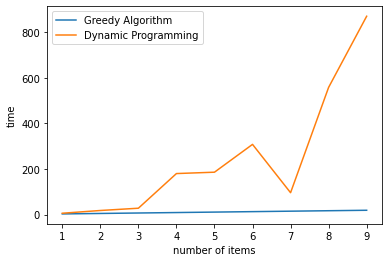

In [ ]:
x=[]; y=[]; y2=[]

verbose = False
for n in range(1,10):
  contG = 0
  contSp = 0; contD = 0
  W, vl, wt = knapsack_instance_generator(n)

  v2 = knapsack(W, wt,vl)
  v = greedyKsack(W, wt, vl)
  
  x.append(n)
  y.append(contG)
  y2.append(contD)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Greedy Algorithm","Dynamic Programming"])

plt.xlabel('number of items')
plt.ylabel('time')

**Análisis del resultado**  
La diferencia es abismal y esto es porque el tiempo de ejecución del algoritmo dinámico es de $n \cdot w$, con $n$ la cantidad de items y $w$ la capacidad de la mochila.  
La mochila tiende a tener bastante capacidad, por lo que al recorrer matrices puede llegar a tomar un tiempo excesivo.

###**Cantidad de Iteraciones/Subproblemas**

Para este experimento observaremos la diferencia entre las dos variantes de algoritmos para resolver el problema de la mochila. Se hará un conteo de los subproblemas resueltos con programación dinámica y también de la cantidad de iteraciones con el algoritmo voraz.

Se usarán $n$ instancias, con $n = 30$.  
Empezando desde $1$ hasta $n$ se graficarán los conteos descritos anteriormente y analizaremos la conducta de los dos algoritmos.

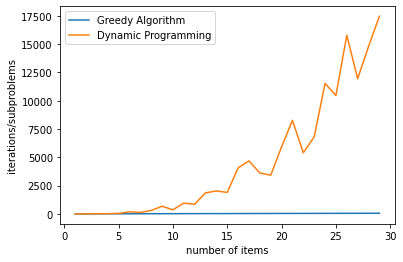

In [ ]:
x=[]; y=[]; y2=[]

verbose = False
for n in range(1,30):
  contG = 0
  contSp = 0
  W, vl, wt = knapsack_instance_generator(n)

  v2 = knapsack(W, wt,vl)
  v = greedyKsack(W, wt, vl)
  
  x.append(n)
  y.append(contG)
  y2.append(contSp)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Greedy Algorithm","Dynamic Programming"])

plt.xlabel('number of items')
plt.ylabel('iterations/subproblems')
plt.show()

**Análisis del resultado**  
Tal y como se puede observar, existe una gran diferencia entre los dos métodos. El algoritmo voraz toma muchisimo menos, en comparación al que implementa programación dinámica. Si bien es cierto que el algoritmo dinámico es más certero, toma mucho tiempo en ejecutarse, por lo que si queremos optimizar nuestro tiempo y esperar un resultado menos exacto, vale la pena implementar el algoritmo voraz para resolver el problema de la mochila. En cambio, la programación dinámica debe resolver bastantes subproblemas, esto se traduce en un mayor tiempo de ejecución.

###**Valor Máximo Encontrado**

Observaremos los resultados de los dos algoritmos y los compararemos, para conocer la conducta de ambos y llegar a una conclusión.  
Se están usando instancias con items desde $1$ hasta $10$, con los mismos objetos para los dos algoritmos.

Se harán 3 experimentos para analizar también los resultados con distintas entradas, veremos el comportamiento de los tres experimentos, desde $1$ hasta $10, 20$ y $50$.

**10 Items**

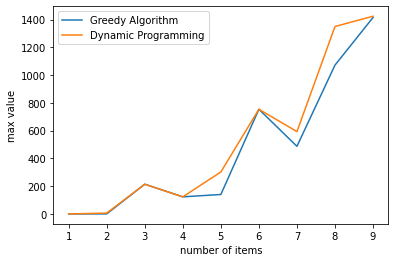

In [40]:
x=[]; y=[]; y2=[]
verbose = False

for n in range(1,10):
  contG = 0; contSp = 0

  W, vl, wt = knapsack_instance_generator(n)
  v2 = knapsack(W, wt,vl)
  v = greedyKsack(W, wt, vl)
  
  x.append(n)
  y.append(v)
  y2.append(v2)

plt.plot(x,y)
plt.plot(x,y2)

plt.legend(["Greedy Algorithm","Dynamic Programming"])
plt.xlabel('number of items')
plt.ylabel('max value')
plt.show()

**20 Items**

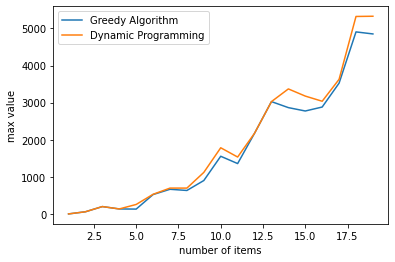

In [32]:
x=[]; y=[]; y2=[]
verbose = False

for n in range(1,20):
  contG = 0; contSp = 0

  W, vl, wt = knapsack_instance_generator(n)
  v2 = knapsack(W, wt,vl)
  v = greedyKsack(W, wt, vl)
  
  x.append(n)
  y.append(v)
  y2.append(v2)

plt.plot(x,y)
plt.plot(x,y2)

plt.legend(["Greedy Algorithm","Dynamic Programming"])
plt.xlabel('number of items')
plt.ylabel('max value')
plt.show()

**50 Items**

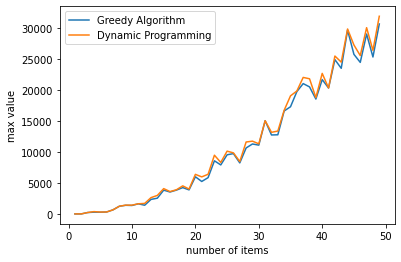

In [26]:
x=[]; y=[]; y2=[]
verbose = False

for n in range(1,50):
  contG = 0; contSp = 0

  W, vl, wt = knapsack_instance_generator(n)
  v2 = knapsack(W, wt,vl)
  v = greedyKsack(W, wt, vl)
  
  x.append(n)
  y.append(v)
  y2.append(v2)

plt.plot(x,y)
plt.plot(x,y2)

plt.legend(["Greedy Algorithm","Dynamic Programming"])
plt.xlabel('number of items')
plt.ylabel('max value')
plt.show()

**Análisis del resultado**  
Observando todos los gráficos y conociendo como se comportan teóricamente, sabemos que la programación dinámica consigue el resultado óptimo, sin fallas. Podemos tomar esto como referencia y concluir que el gráfico de color naranja son los verdaderos valores máximos posibles para el problema de la mochila. 

Asumiendo esto, es posible comparar como se comporta el algoritmo voraz, y a pesar de que se acerca mucho al valor esperado e incluso en ocasiones llega a tomar este valor, el algoritmo greedy no entrega resultados exactos y nos da valores menores. Esto es debido a que esta variación no hace una investigación muy profunda y no llega a indagar en todos los casos posibles, eligiendo un camino que en ese momento parece óptimo, y es posible que ese camino no derive al verdadero valor óptimo que estamos buscando.